# Homework 2 
## Building a Machine Learning Model
### Purpose:
The purpose of this notebook is to practice building a regression model using the data provided by Kaggle in the House Prices: Advanced Regression challenge in order to predict house prices. In this notebook, I will load in the data, clean it, visualize it, compare a number of possible regression models, and choose one to tune and interpret.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Get the train and test data
train = pd.read_csv(r"C:\Users\nelso\OneDrive\Machine_Learning\Homeworks\HW2\Housing_Prices_Data\train.csv")
test = pd.read_csv(r"C:\Users\nelso\OneDrive\Machine_Learning\Homeworks\HW2\Housing_Prices_Data\test.csv")
data = [train, test]

In [4]:
#Make sure the data read in okay
print("Training Data: \n")
print(train.describe())
print("*"*100)
print("Test Data: \n")
print(test.describe())

Training Data: 

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091  

It looks like all of our data was read in just fine. First, we are going to visualize our data and see what we are working with. We are going to start by looking at our target variable, the sale price. Let's look at the distribution of the sale prices for the data we are working with.

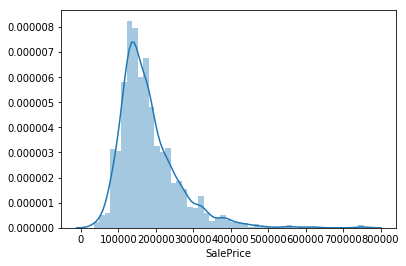

In [10]:
#Look at histogram of SalePrice
sns.distplot(train.SalePrice)

So it looks like our sales prices are not exactly normally distributed and are definitely skewed to the right. That is good to know! 

Now we are going to look at some of the other variables and how they relate to sales price. This is going to be done using a correlation heatmap. Currently we have 80 different variables. That is a lot of variables to deal with at once. So for now, we are going to take the 12 variables most correlated with sales price and look at them.

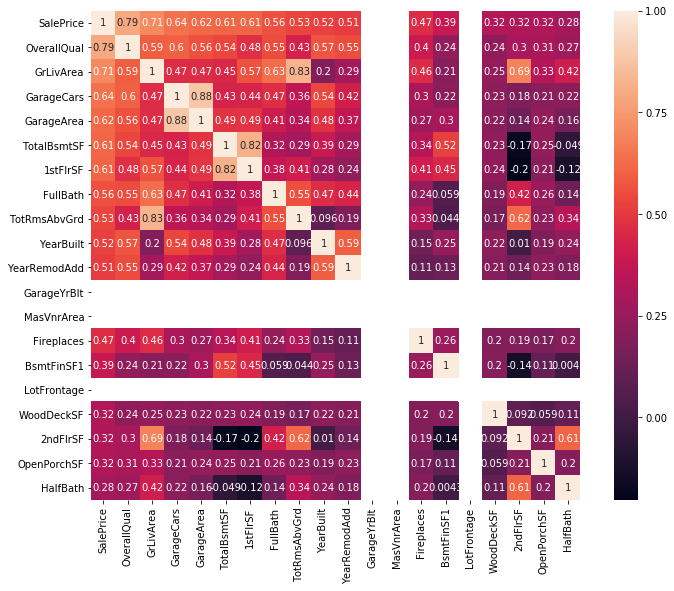

In [22]:
#Create a new set of correlation data. 
corr_train = train.corr()
#Select the 20 variables most correlated with sales price and show a heat map.
best_20 = corr_train.nlargest(20, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[best_20].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, square = True, annot = True, yticklabels=best_20.values, xticklabels=best_20.values)

In the correlation heat map we get some important information. First, we can see what variables are most highly correlated with the Sale Price. We see that the OverallQual, GrLivArea, and GarageCars are the three most correlated variables with sale price. Another thing we see is that some of the variables are correlated with each other. We may not want to use all of these variables in the future doing our prediction because of the colinearity between them. 

We can also see that a few of these variables leave us with blank lines. This is probably because they have a few missing values that we can take care of later. Nonetheless, this still gives us a good overview of the more important variables.

Right now we are going to dive in a little more with the three variables above that are most correlated with the price.

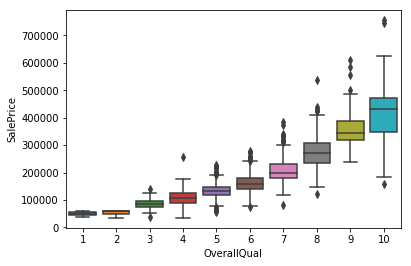

In [15]:
#Overall Quality boxplot
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = train)

From here we can see mostly what we might expect. We find that the higher the quality of a house, the more expensive it gets. And while there are a few observations outside of the whiskers, it doesn't look like there are any very significant outliers to worry about.

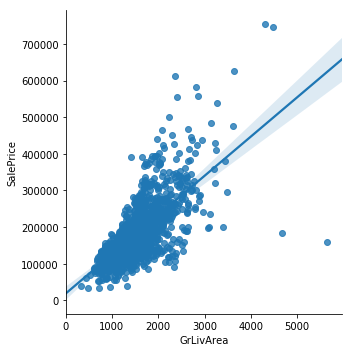

In [16]:
#Scatterplot looking at GrLivArea
sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = train)

Here we are looking mostly linear again although it looks like it might be following a little bit of an exponential path. Let's look at one more plot.

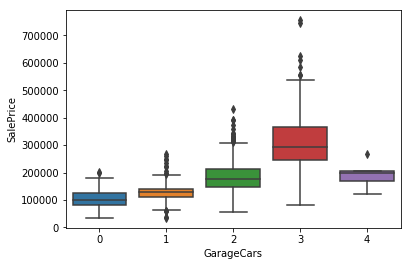

In [17]:
#Boxplot for GarageCars
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = train)

Once again we find mostly what we probably expected. The price trends upward as garages hold more cars until we get to the 4 car garages. 

So now we have a feel for which variables are the most important for the price of the houses and the relationships between those variables and our target variable. Next, we are going to check for missing variables and decide what to do with those. 

In [9]:
#Check to see missing values
train.isna().sum().sort_values(ascending = False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

There is some good news as to the missing variables we have. A lot of the ones towards the top of our list are variables that did not show up as highly correlated with our sale prices. We can pretty safely just throw those out since we are missing so much of that data.

Even though I am throwing some of these first ones out, it is valuable to note that the data is most likely missing because the houses do not have these types of features. For example, if we look at the PoolQC variable denoting pool quality, these are all missing where the pool area of houses is 0. If pools showed up as more correlated to sale price this might be worth looking at more closely. But since they are not we will throw out a lot of them and fill in the missing data for the more important variables.

In [21]:
#Throw out columns with too many missing values in both the training and test sets. 
for df in data:
    print("Number of columns before dropping variables:", df.shape[1])
    df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)
    print("Number of columns after dropping variables:", df.shape[1], "\n")



Number of columns before dropping variables: 81
Number of columns after dropping variables: 76 

Number of columns before dropping variables: 80
Number of columns after dropping variables: 75 



So now we have taken care of some of the less important variables that were in our dataset. So what should we do with the missing values of the important variables? We definitely don't want to throw out an entire column of important data that will help our predictive model if we want to create anything of value. So let's do a little looking and see if we can find the cause of the missingness.

We are going to look at lot frontage first since it has the most missing values. When reading the description of the variable, it is the linear feet of street connected to the property. We can assume this will be somewhat related to the lot area. We can impute the missing values by grouping houses in categories based on lot area and use the medians of the different groups to fill in the missing values accordingly.

In [25]:
#Divide the observations into groups based on lot size
train['lot_bins'] = pd.cut(train['LotArea'], 4)
train['lot_bins'].head()

0    (1086.055, 54786.25]
1    (1086.055, 54786.25]
2    (1086.055, 54786.25]
3    (1086.055, 54786.25]
4    (1086.055, 54786.25]
Name: lot_bins, dtype: category
Categories (4, interval[float64]): [(1086.055, 54786.25] < (54786.25, 108272.5] < (108272.5, 161758.75] < (161758.75, 215245.0]]

In [30]:
#Assign each bin a number, compute the median lot frontLotArea, and use that to impute missing values
train.loc[train['LotArea'] <= 1086.055, 'lot_bin']=0
train.loc[(train['LotArea'] > 1086.055) & (train['LotArea'] <= 54786.25), 'lot_bin']=1
train.loc[(train['LotArea'] > 54786.25) & (train['LotArea'] <= 108272.5), 'lot_bin']=2
train.loc[train['LotArea'] > 108272.5, 'lot_bin']=3
train = train.drop('lot_bins', axis = 1)